In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd 

In [8]:
df = pd.read_csv('/content/play.csv')
df

,Day,Weather,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,90,10,No
1,2,Cloudy,Hot,95,5,Yes
2,3,Sunny,Mild,70,30,Yes
3,4,Cloudy,Mild,89,25,Yes
4,5,Rainy,Mild,85,25,No
5,6,Rainy,Cool,60,30,No
6,7,Rainy,Mild,92,20,Yes
7,8,Sunny,Hot,95,20,No
8,9,Cloudy,Hot,65,12,Yes
9,10,Rainy,Mild,100,25,No


In [11]:
df.drop(columns = 'Day', axis = 1, inplace = True)
df

,Weather,Temperature,Humidity,Wind,Play
0,Sunny,Hot,90,10,No
1,Cloudy,Hot,95,5,Yes
2,Sunny,Mild,70,30,Yes
3,Cloudy,Mild,89,25,Yes
4,Rainy,Mild,85,25,No
5,Rainy,Cool,60,30,No
6,Rainy,Mild,92,20,Yes
7,Sunny,Hot,95,20,No
8,Cloudy,Hot,65,12,Yes
9,Rainy,Mild,100,25,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Weather      10 non-null     object
 1   Temperature  10 non-null     object
 2   Humidity     10 non-null     int64 
 3   Wind         10 non-null     int64 
 4   Play         10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [17]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder

In [27]:
df_clean = df.copy()
lable_encoder = LabelEncoder()
df_clean['Weather'] = lable_encoder.fit_transform(df['Weather'])
df_clean['Temperature'] = lable_encoder.fit_transform(df['Temperature'])
df_clean['Play'] = lable_encoder.fit_transform(df['Play'])
df_clean

,Weather,Temperature,Humidity,Wind,Play
0,2,1,90,10,0
1,0,1,95,5,1
2,2,2,70,30,1
3,0,2,89,25,1
4,1,2,85,25,0
5,1,0,60,30,0
6,1,2,92,20,1
7,2,1,95,20,0
8,0,1,65,12,1
9,1,2,100,25,0


In [28]:
cols = df.columns.to_list()
cols.remove('Play')
cols

['Weather', 'Temperature', 'Humidity', 'Wind']

In [29]:
cols = df.columns.to_list()[:-1]
cols

['Weather', 'Temperature', 'Humidity', 'Wind']

In [30]:
features = df_clean[cols]
response = df_clean['Play']

In [32]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [35]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual':response_test, 'predict': predictions})
table

,actual,predict
2,1,1
8,1,1
4,0,1


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.6666666666666666

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[0, 1],
       [0, 2]])

In [38]:
idx = ['actual 0', 'actual 1']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index = idx)
cm

,pred 0,pred 1
actual 0,0,1
actual 1,0,2


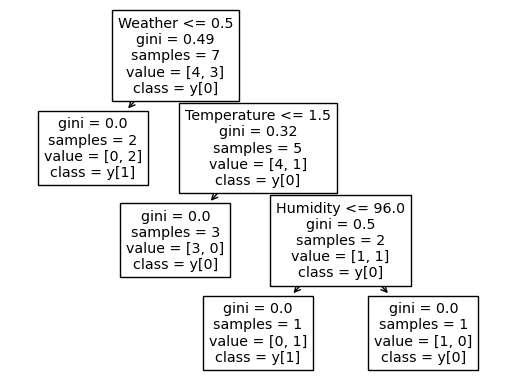

In [39]:
from sklearn.tree import plot_tree
decision_tree_plot = plot_tree(classifier, feature_names = cols, class_names = True)

In [42]:
classifier.feature_importances_

array([0.53333333, 0.175     , 0.29166667, 0.        ])

In [40]:
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Weather,0.533333
1,Temperature,0.175000
2,Humidity,0.291667
3,Wind,0.000000


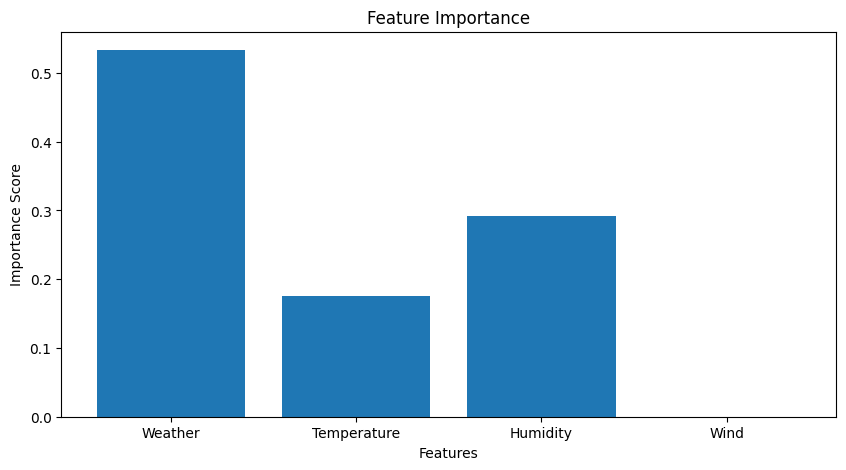

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()